## Offline activity : Module II

Date: 23.04.2022

In [1]:
import numpy as np
import pandas as pd
import statistics
import matplotlib.pyplot as plt
import requests
import json

In [2]:
%%capture
pip install chembl_webresource_client

###  Task 1

#### Retrieve all approved drugs from the ChEMBL database

In [3]:
from chembl_webresource_client.new_client import new_client


drugs = new_client.drug
approved_drugs = drugs.filter(max_phase=4) # not neccessary : new_client.drug only contains approved drugs

print(f'The number of approved currently equals {len(drugs)}.')

The number of approved currently equals 14293.


#### Sort drugs by approval year and name

In [4]:
# exemplary drug
drugs[0]

{'applicants': ['Idt Australia Ltd',
  'Teva Pharmaceuticals Usa',
  'Watson Laboratories Inc',
  'American Therapeutics Inc',
  'Mylan Pharmaceuticals Inc',
  'Pfizer Inc',
  'Ivax Pharmaceuticals Inc Sub Teva Pharmaceuticals Usa',
  'Novitium Pharma Llc',
  'Dava Pharmaceuticals Inc',
  'Purepac Pharmaceutical Co'],
 'atc_classification': [{'code': 'C02CA01',
   'description': 'CARDIOVASCULAR SYSTEM: ANTIHYPERTENSIVES: ANTIADRENERGIC AGENTS, PERIPHERALLY ACTING: Alpha-adrenoreceptor antagonists'}],
 'availability_type': 1,
 'biotherapeutic': None,
 'black_box': False,
 'black_box_warning': '0',
 'chirality': 2,
 'development_phase': 4,
 'drug_type': 1,
 'first_approval': 1976,
 'first_in_class': False,
 'helm_notation': None,
 'indication_class': 'Antihypertensive',
 'molecule_chembl_id': 'CHEMBL2',
 'molecule_properties': {'alogp': '1.78',
  'aromatic_rings': 3,
  'cx_logd': '1.43',
  'cx_logp': '1.65',
  'cx_most_apka': None,
  'cx_most_bpka': '7.24',
  'full_molformula': 'C19H21N5

In [5]:
drugs_sorted_name = approved_drugs.order_by('synonyms') # drugs sorted by name
drugs_sorted_name[0]

{'applicants': None,
 'atc_code_description': None,
 'availability_type': None,
 'biotherapeutic': None,
 'black_box': False,
 'black_box_warning': '0',
 'chirality': -1,
 'development_phase': 2,
 'drug_type': -1,
 'first_approval': None,
 'first_in_class': False,
 'helm_notation': None,
 'indication_class': None,
 'molecule_chembl_id': 'CHEMBL4297679',
 'molecule_properties': None,
 'molecule_structures': None,
 'molecule_synonyms': [{'molecule_synonym': '10-1074',
   'syn_type': 'OTHER',
   'synonyms': '10-1074'},
  {'molecule_synonym': '10-1074',
   'syn_type': 'RESEARCH_CODE',
   'synonyms': '10-1074'}],
 'ob_patent': None,
 'oral': False,
 'parenteral': False,
 'prodrug': False,
 'research_codes': ['10-1074'],
 'rule_of_five': False,
 'sc_patent': None,
 'synonyms': ['10-1074'],
 'topical': False,
 'usan_stem': None,
 'usan_stem_definition': None,
 'usan_stem_substem': None,
 'usan_year': None,
 'withdrawn_class': None,
 'withdrawn_country': None,
 'withdrawn_flag': '0',
 'withdra

In [6]:
drugs_sorted_year = approved_drugs.order_by('first_approval') # drugs sorted by approval year

drugs_sorted_year[0]

{'applicants': ['Eli Lilly And Co'],
 'atc_classification': [{'code': 'J01EB04',
   'description': 'ANTIINFECTIVES FOR SYSTEMIC USE: ANTIBACTERIALS FOR SYSTEMIC USE: SULFONAMIDES AND TRIMETHOPRIM: Short-acting sulfonamides'}],
 'availability_type': 0,
 'biotherapeutic': None,
 'black_box': False,
 'black_box_warning': '0',
 'chirality': 2,
 'development_phase': 4,
 'drug_type': 1,
 'first_approval': 1939,
 'first_in_class': False,
 'helm_notation': None,
 'indication_class': 'Suppressant (dermatitis herpetiformis)',
 'molecule_chembl_id': 'CHEMBL700',
 'molecule_properties': {'alogp': '1.46',
  'aromatic_rings': 2,
  'cx_logd': '0.24',
  'cx_logp': '1.01',
  'cx_most_apka': '6.24',
  'cx_most_bpka': '2.14',
  'full_molformula': 'C11H11N3O2S',
  'full_mwt': '249.30',
  'hba': 4,
  'hba_lipinski': 5,
  'hbd': 2,
  'hbd_lipinski': 3,
  'heavy_atoms': 17,
  'molecular_species': 'ACID',
  'mw_freebase': '249.30',
  'mw_monoisotopic': '249.0572',
  'num_lipinski_ro5_violations': 0,
  'num_ro

In [7]:
first_approval_year = drugs_sorted_year[0]['first_approval']
print(f'The first drug was approved in the year {first_approval_year}.')

The first drug was approved in the year 1939.


### Task 2

#### Filtering the drugs that were approved since 2012

In [8]:
drugs_since_2012 = drugs.filter(first_approval__in = [x for x in range(2012,2023)])
len(drugs_since_2012)


446

#### Determining the UniProt accession numbers

In [9]:
targets = new_client.target

# exemplary target
targets[0]

{'cross_references': [{'xref_id': 'O43451',
   'xref_name': None,
   'xref_src': 'canSAR-Target'},
  {'xref_id': 'Maltase-glucoamylase',
   'xref_name': None,
   'xref_src': 'Wikipedia'}],
 'organism': 'Homo sapiens',
 'pref_name': 'Maltase-glucoamylase',
 'species_group_flag': False,
 'target_chembl_id': 'CHEMBL2074',
 'target_components': [{'accession': 'O43451',
   'component_description': 'Maltase-glucoamylase, intestinal',
   'component_id': 434,
   'component_type': 'PROTEIN',
   'relationship': 'SINGLE PROTEIN',
   'target_component_synonyms': [{'component_synonym': '3.2.1.20',
     'syn_type': 'EC_NUMBER'},
    {'component_synonym': '3.2.1.3', 'syn_type': 'EC_NUMBER'},
    {'component_synonym': 'Alpha-glucosidase', 'syn_type': 'UNIPROT'},
    {'component_synonym': 'Glucan 1,4-alpha-glucosidase',
     'syn_type': 'UNIPROT'},
    {'component_synonym': 'Glucoamylase', 'syn_type': 'UNIPROT'},
    {'component_synonym': 'Maltase', 'syn_type': 'UNIPROT'},
    {'component_synonym': 'Ma

In [10]:
# exemplary accession number
targets[0]['target_components'][0]['accession']

'O43451'

In [11]:
activities = new_client.activity
#exemplary activity
activities[0]

{'activity_comment': None,
 'activity_id': 31863,
 'activity_properties': [],
 'assay_chembl_id': 'CHEMBL663853',
 'assay_description': 'Inhibitory concentration against human DNA topoisomerase II, alpha mediated relaxation of pBR322; no measurable activity',
 'assay_type': 'B',
 'assay_variant_accession': None,
 'assay_variant_mutation': None,
 'bao_endpoint': 'BAO_0000190',
 'bao_format': 'BAO_0000357',
 'bao_label': 'single protein format',
 'canonical_smiles': 'c1ccc(-c2nc3c(-c4nc5ccccc5o4)cccc3o2)cc1',
 'data_validity_comment': None,
 'data_validity_description': None,
 'document_chembl_id': 'CHEMBL1137930',
 'document_journal': 'Bioorg. Med. Chem. Lett.',
 'document_year': 2004,
 'ligand_efficiency': None,
 'molecule_chembl_id': 'CHEMBL113081',
 'molecule_pref_name': None,
 'parent_molecule_chembl_id': 'CHEMBL113081',
 'pchembl_value': None,
 'potential_duplicate': False,
 'qudt_units': 'http://www.openphacts.org/units/Nanomolar',
 'record_id': 206172,
 'relation': '>',
 'src_id'

In [12]:
drugs_uniprot_AC = {}
number_of_AC = []

for drug in drugs_since_2012:
    uniprot_AC = []
    drug['molecule_chembl_id']
    associated_targets = activities.filter(molecule_chembl_id=drug['molecule_chembl_id'])
    number_of_AC.append(len(associated_targets))
    for activity in associated_targets:
        target = targets.filter(target_chembl_id = activity['target_chembl_id'])[0]
        if len(target['target_components']) > 0:
            if len(target['target_components'][0]['accession']) > 0:
                uniprot_AC.append(target['target_components'][0]['accession'])
    drugs_uniprot_AC[drug['molecule_chembl_id']] = uniprot_AC

# dictionary with chembl id of drugs as keys and a list of UniProt accession number of associated targets as values
drugs_uniprot_AC 

{'CHEMBL278020': ['P02545',
  'P08482',
  'P08482',
  'Q96KQ7',
  'P11712',
  'P11712',
  'P08684',
  'P05177',
  'P33261',
  'P05177',
  'P10635',
  'P08684',
  'P33261',
  'P10635',
  'P49798',
  'P15289',
  'P04058',
  'P81908',
  'O42275',
  'P06276',
  'O42275',
  'P06276',
  'P22303',
  'O42275',
  'P06276',
  'O95342',
  'O95342',
  'O95342',
  'Q92887',
  'O15438',
  'O15439',
  'O42275',
  'P0DTD1',
  'O42275',
  'P81908',
  'P22303'],
 'CHEMBL110': ['P04406',
  'P28593',
  'P00811',
  'P52270',
  'P52270',
  'O89049',
  'O75496',
  'Q99700',
  'Q8WS26',
  'Q197X6',
  'P25779',
  'Q7Z1V1',
  'Q7Z1V1',
  'Q7Z1V1',
  'P22830',
  'P08397',
  'O95342',
  'Q92887',
  'O15438',
  'O15439',
  'Q12809',
  'P05177',
  'P11712',
  'P33261',
  'P10635',
  'P08684',
  'Q96GD4',
  'P0DTD1'],
 'CHEMBL17860': ['P15823',
  'P22086',
  'P15823',
  'P15823',
  'P08913',
  'P08913',
  'P18089',
  'P18825',
  'P18089',
  'P18825',
  'P08913',
  'P18089',
  'P18825',
  'P08908',
  'Q4G017',
  'P0D

In [18]:
# exemplary list of UniProt accession numbers
drugs_uniprot_AC.get(drugs_since_2012[0]['molecule_chembl_id'])

['P02545',
 'P08482',
 'P08482',
 'Q96KQ7',
 'P11712',
 'P11712',
 'P08684',
 'P05177',
 'P33261',
 'P05177',
 'P10635',
 'P08684',
 'P33261',
 'P10635',
 'P49798',
 'P15289',
 'P04058',
 'P81908',
 'O42275',
 'P06276',
 'O42275',
 'P06276',
 'P22303',
 'O42275',
 'P06276',
 'O95342',
 'O95342',
 'O95342',
 'Q92887',
 'O15438',
 'O15439',
 'O42275',
 'P0DTD1',
 'O42275',
 'P81908',
 'P22303']

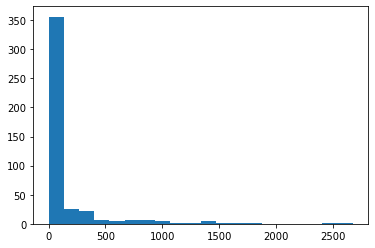

In [19]:
plt.hist(number_of_AC, bins = 20)
plt.show()

In [20]:
number_of_AC.count(0)/446 # number of drugs with no associated drug

0.3811659192825112

In [21]:
print(f'The median of protein targets associated with a compound that was approved since 2012 is {statistics.median(number_of_AC) }.')
print(f'(The mean of protein targets associated with a compound is {statistics.mean(number_of_AC) }.)')

The median of protein targets associated with a compound that was approved since 2012 is 9.5.
(The mean of protein targets associated with a compound is 135.50896860986546.)


Remark: The median is not an integer because the number of approved drugs since 2012 is even and the two 'middle values' are 9 and 10. 

In [25]:
# retrieve all protein_targets that are associated to at least one drug that was approved since 2012
uniprot_accession_numbers = []
for key in drugs_uniprot_AC.keys():
    uniprot_accession_numbers += drugs_uniprot_AC[key]
uniprot_accession_numbers = list(np.unique(uniprot_accession_numbers)) # eliminate duplicates
uniprot_accession_numbers # list of all retrieved uniprot accession numbers

['A0A143MHK7',
 'A3EZJ3',
 'A4TVL0',
 'A5H660',
 'A5Z252',
 'A6XA80',
 'A7WP95',
 'A8DS27',
 'B2RXH2',
 'B4URF0',
 'B5DFE2',
 'C3TDZ2',
 'C7C422',
 'D2K2A8',
 'D3ZUM4',
 'D5F1R0',
 'E2R5U8',
 'G4VFD7',
 'G8A3U3',
 'I3LIR5',
 'K7XJL6',
 'O00141',
 'O00167',
 'O00204',
 'O00238',
 'O00254',
 'O00255',
 'O00264',
 'O00311',
 'O00329',
 'O00408',
 'O00418',
 'O00443',
 'O00444',
 'O00462',
 'O00506',
 'O00571',
 'O00625',
 'O00750',
 'O00754',
 'O00764',
 'O02662',
 'O02663',
 'O08537',
 'O08705',
 'O08914',
 'O09028',
 'O14578',
 'O14730',
 'O14733',
 'O14757',
 'O14920',
 'O14936',
 'O14965',
 'O14976',
 'O14980',
 'O15075',
 'O15111',
 'O15146',
 'O15197',
 'O15244',
 'O15245',
 'O15254',
 'O15264',
 'O15357',
 'O15379',
 'O15438',
 'O15439',
 'O15530',
 'O15648',
 'O19045',
 'O35435',
 'O35627',
 'O35913',
 'O42275',
 'O43193',
 'O43283',
 'O43293',
 'O43318',
 'O43353',
 'O43451',
 'O43613',
 'O43614',
 'O43683',
 'O43781',
 'O43924',
 'O60285',
 'O60313',
 'O60331',
 'O60361',
 'O605

### Task 3

In [26]:
# splitting targets in sections of at most 100 elements the ebi website only allows at most 100 keywords
slices = [0,100,200,300,400,446] 
keywords = []

for i in [0,1,2,3,4]:

    protein_targets_str = ','.join(list(protein_targets)[slices[i]:slices[i+1]])
    ebi_url = 'https://www.ebi.ac.uk/proteins/api/proteins?offset=0&size=100&accession='+protein_targets_str
    request = requests.get(ebi_url, headers={'Accept': 'application/json'})
    for t in np.arange(slices[i+1] - slices[i]):
        for word in request.json()[t]['keywords']:
            keywords.append(word['value'])

keywords

['Membrane',
 'Nucleotidyltransferase',
 'RNA-directed RNA polymerase',
 'Transferase',
 'Viral RNA replication',
 'ATP-binding',
 'Capsid protein',
 'Disulfide bond',
 'Fusion of virus membrane with host endosomal membrane',
 'Fusion of virus membrane with host membrane',
 'Glycoprotein',
 'Host endoplasmic reticulum',
 'Host membrane',
 'Host-virus interaction',
 'Hydrolase',
 'Membrane',
 'Nucleotide-binding',
 'Protease',
 'Serine protease',
 'Transmembrane',
 'Transmembrane helix',
 'Viral attachment to host cell',
 'Viral penetration into host cytoplasm',
 'Viral RNA replication',
 'Virion',
 'Virus entry into host cell',
 '3D-structure',
 'Calcium',
 'Metal-binding',
 'Zinc',
 '3D-structure',
 'Metal-binding',
 'Zinc',
 'Calcium',
 'Disulfide bond',
 'Glycoprotein',
 'Glycosidase',
 'Host cell membrane',
 'Host membrane',
 'Hydrolase',
 'Membrane',
 'Metal-binding',
 'Signal-anchor',
 'Transmembrane',
 'Transmembrane helix',
 'Virion',
 'Endoplasmic reticulum',
 'Leukotriene bio

<AxesSubplot:title={'center':'Counts of top 10 most common keywords'}, xlabel='keyword', ylabel='counts'>

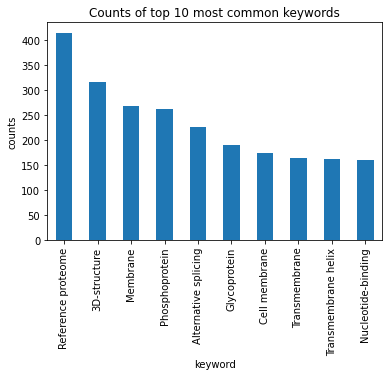

In [27]:
keywords_top10 = pd.Series(keywords).value_counts()[0:10] # only taking 10 most common keywords
keywords_top10.plot(kind = 'bar', title = 'Counts of top 10 most common keywords', xlabel = 'keyword', ylabel = 'counts')

In [28]:
# top 10 most common keywords and the number of times they appear 
pd.Series(keywords).value_counts()[0:10]

Reference proteome      415
3D-structure            317
Membrane                268
Phosphoprotein          262
Alternative splicing    227
Glycoprotein            190
Cell membrane           173
Transmembrane           163
Transmembrane helix     162
Nucleotide-binding      159
dtype: int64

### Interpretation of the results

Task 1: The first drug was approved 83 years ago in 1939. Since then, there are currently 14293 approved drugs which means, on average ca. 172 drugs were approved per year. However, since 2012, only 446 drugs have been approved. So over the past 10 years, the yearly average sank to only about 45 approved per year.

Task 2: The median number of protein targets associated with a drug that has been approved since 2012 is 9,5. But this number is not representative. Almost 40% of the drugs have no associated protein target (which implies that they have a different type of target?). A few drugs with an extremely low selectivity have as much as 2500 associated protein targets. These outliers raise the median.

Task 3: The most common keyword is "Reference proteome" which describes a represenative for the set of proteins that can be expressed by a specific organism. It seems reasonable that a protein target that is in such a 'model proteome' is particularly favorable because it suggests that they are expressed by the majority of individuals of a certain organism. Thus, a drug associated to this protein target is more likely to work for all organisms and the effect might not vary among individuals.
I can imagine that the proteome of different type of organisms can be of interest: The one of viruses and bacteria if the drug target is a protein in bacteria/viruses (if the drug is used for bacterial or viral infections). The one of lab animals like mice to see if a drug can be tested on them. The one of humans if the drug target is a protein in humans. Or in case of the protein target being bacterial/viral to see if humans also express this protein to avoid potential side effects. 